In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 360
import numpy as np

plt.rcParams.update({
    "text.usetex": True,
    "font.serif": ["Times New Roman"],
    })

from datetime import datetime
filename = '/data/user/valeriatorres/galactic_noise/SouthPole/GalOscillation_Time_2024_01_01-2024_01_31_Freq_90-110.npz'

In [4]:
df =pd.DataFrame({'hola':[2,1,2], 'adios':[2,1,0]})
df = df.sort_values(by=['hola'])
df

,hola,adios
1,1,1
0,2,2
2,2,0


In [24]:
data = np.load(filename, allow_pickle=True)
time = data['time']
rms = dict(rms11 = data['rms10'], rms12 = data['rms11'],
           rms21 = data['rms20'], rms22 = data['rms21'],
           rms31 = data['rms30'], rms32 = data['rms31'])

In [6]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, Galactic
from astropy.time import Time

import numpy as np

In [25]:
time_utc = pd.to_datetime(time)

In [26]:
location = EarthLocation.of_site('IceCube')
time = Time(time_utc)
gc_coord = SkyCoord.from_name('Galactic Center')
altaz_frame = AltAz(obstime=time, location=location)
gc_altaz = gc_coord.transform_to(altaz_frame).az.deg

In [10]:
from astropy.coordinates import get_sun

sun_coord = get_sun(time)
altaz_frame = AltAz(obstime=time, location=location)
sun_altaz = sun_coord.transform_to(altaz_frame)
azim_sun = sun_altaz.az.deg

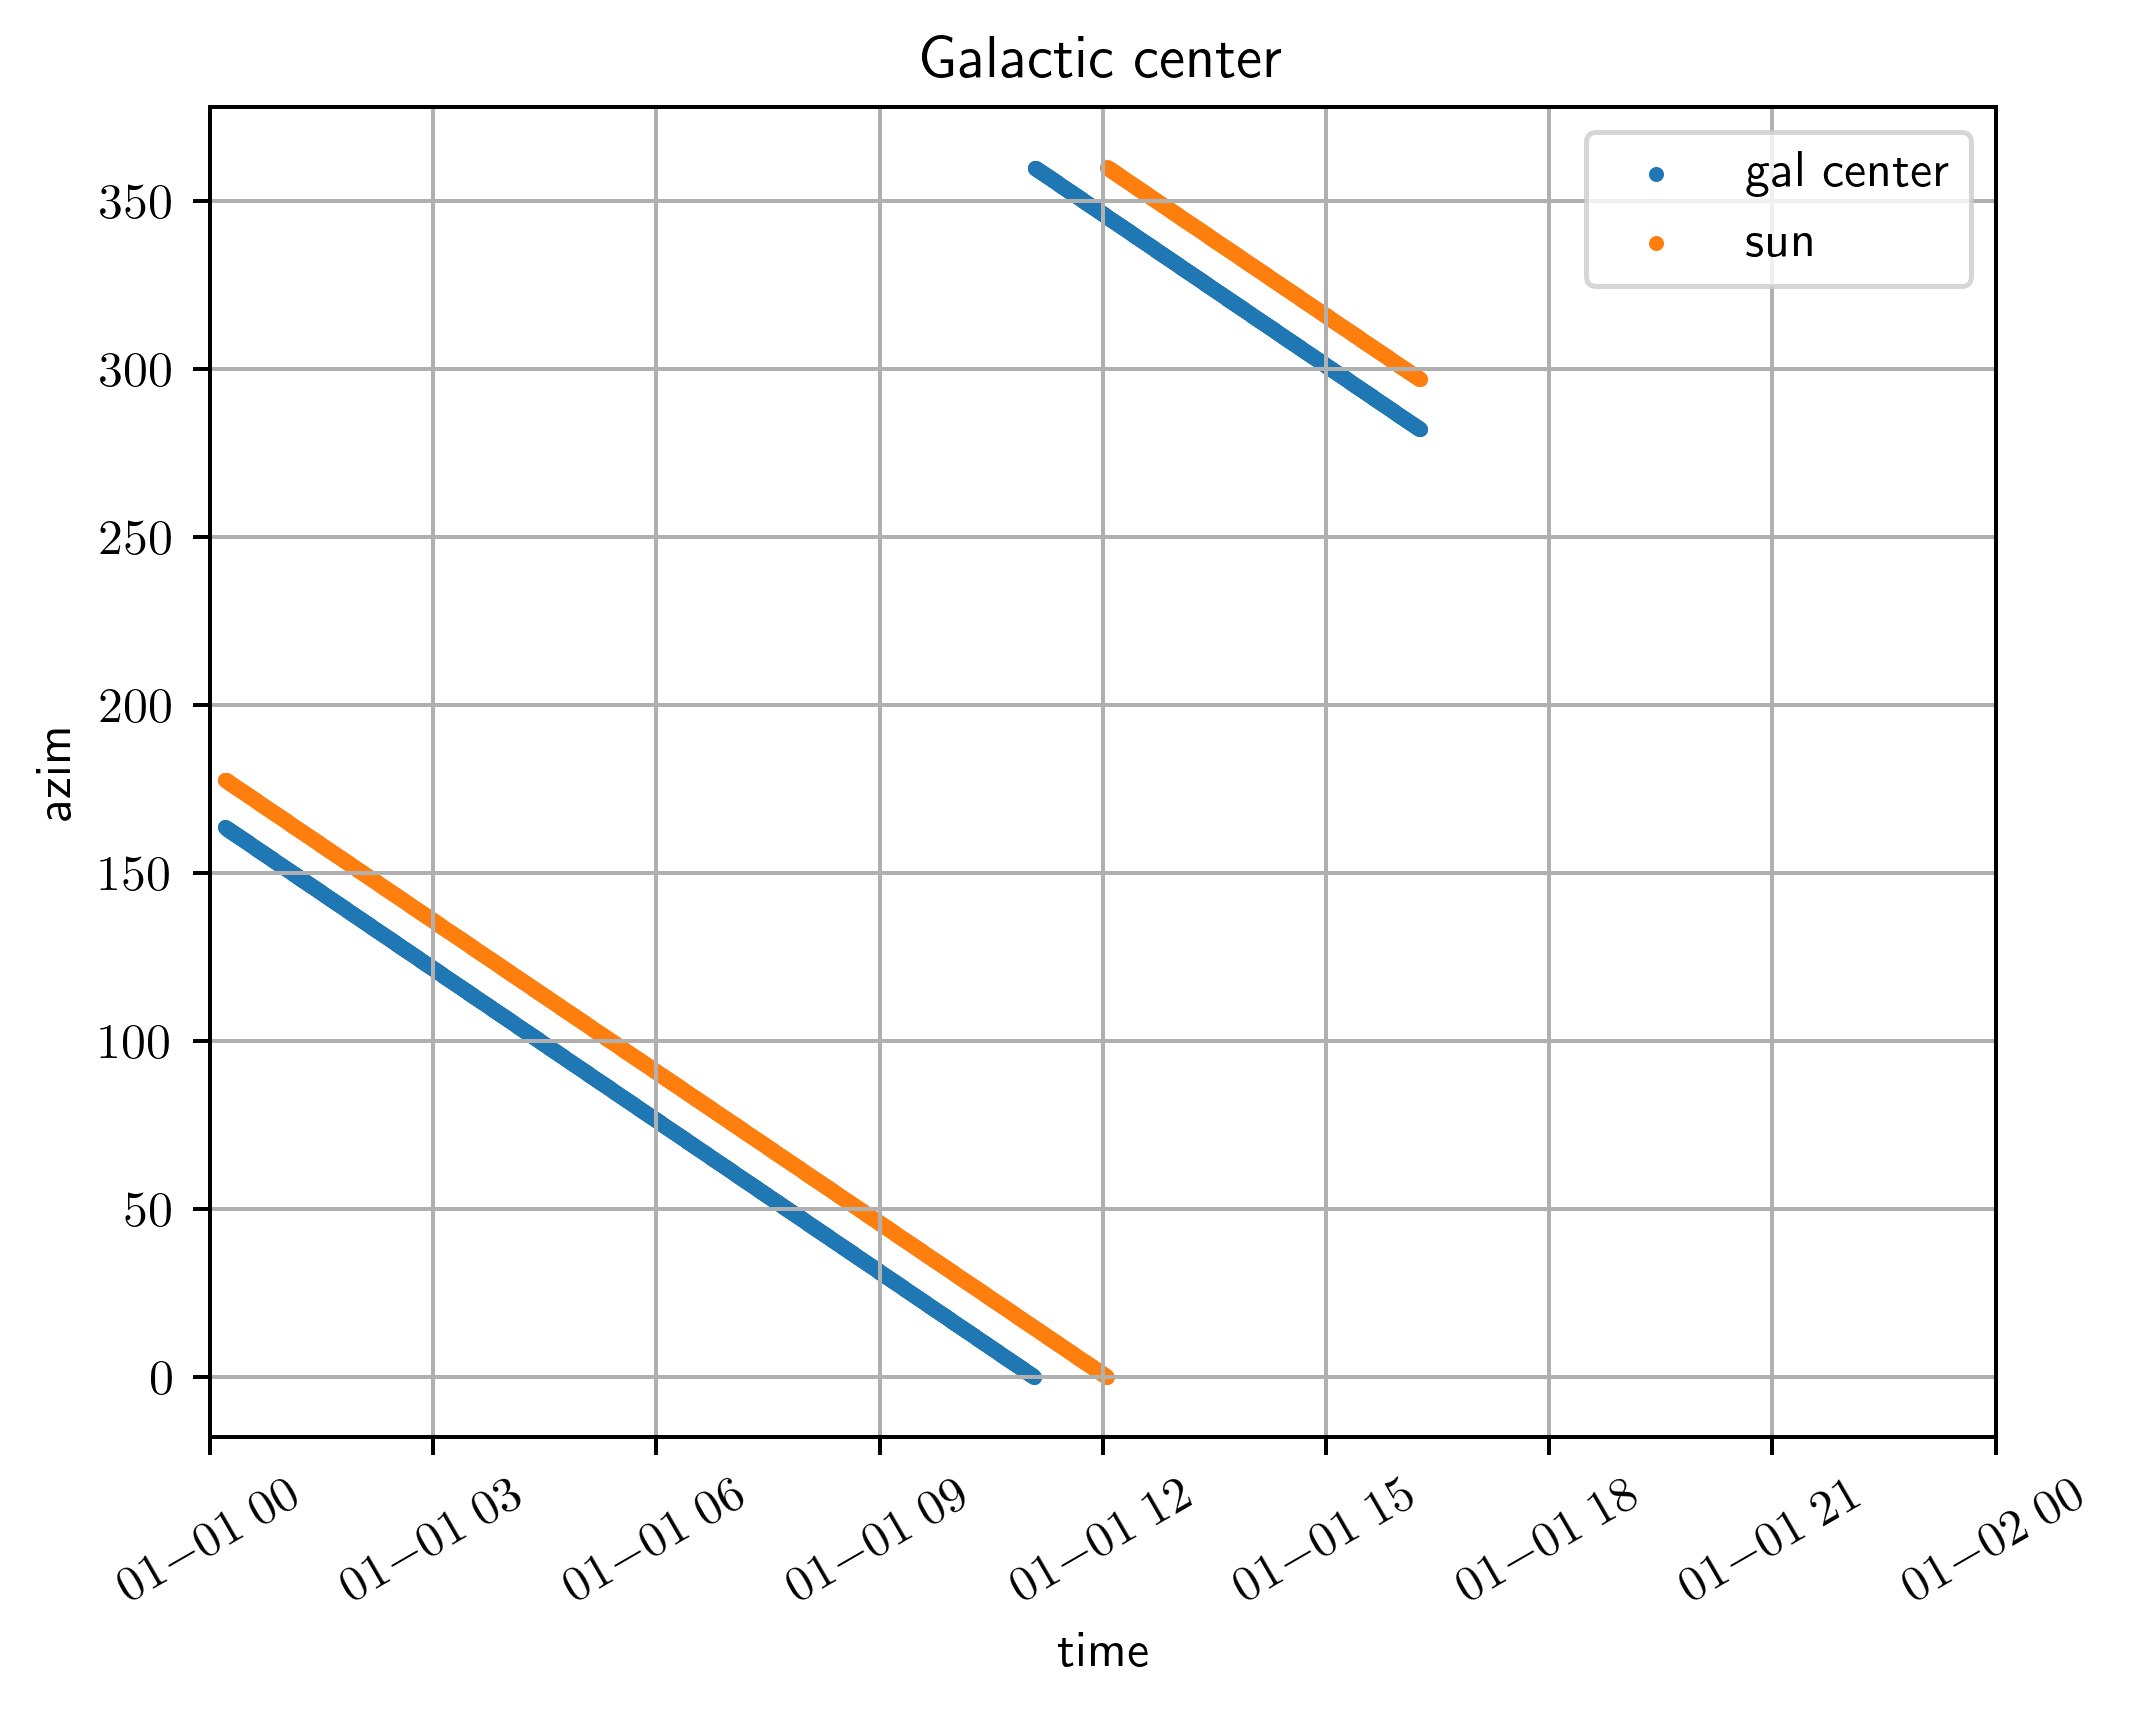

In [11]:
plt.scatter(time_utc, gc_altaz, s=4, label='gal center')
plt.scatter(time_utc, azim_sun, s=4, label='sun')

plt.ylabel('azim')
plt.xlabel('time')
plt.xticks(rotation=30)
plt.xlim(datetime(2024,1,1), datetime(2024,1,2))
plt.title('Galactic center')

plt.grid()
plt.legend()
plt.show()

### ------------------------------------------------

In [12]:
from icecube import astro

In [13]:
t = Time(time_utc, scale='utc')
t.jd

array([2460311.50832824, 2460311.50853754, 2460311.50874684, ...,
       2460313.17715993, 2460313.17736923, 2460313.17757853])

In [14]:
az = np.degrees(astro.sun_dir(t.jd-2400000.5))

In [15]:
az[0]

array([67.02780724, 67.02783133, 67.02785541, ..., 67.17103599,
       67.17105634, 67.17107671])

In [16]:
df_i = pd.DataFrame({'time':time_utc, 'azim_sun':azim_sun, 'azim_gc':gc_altaz, 'icecube':az[1]})
df_i = df_i.sort_values(by=['time'])

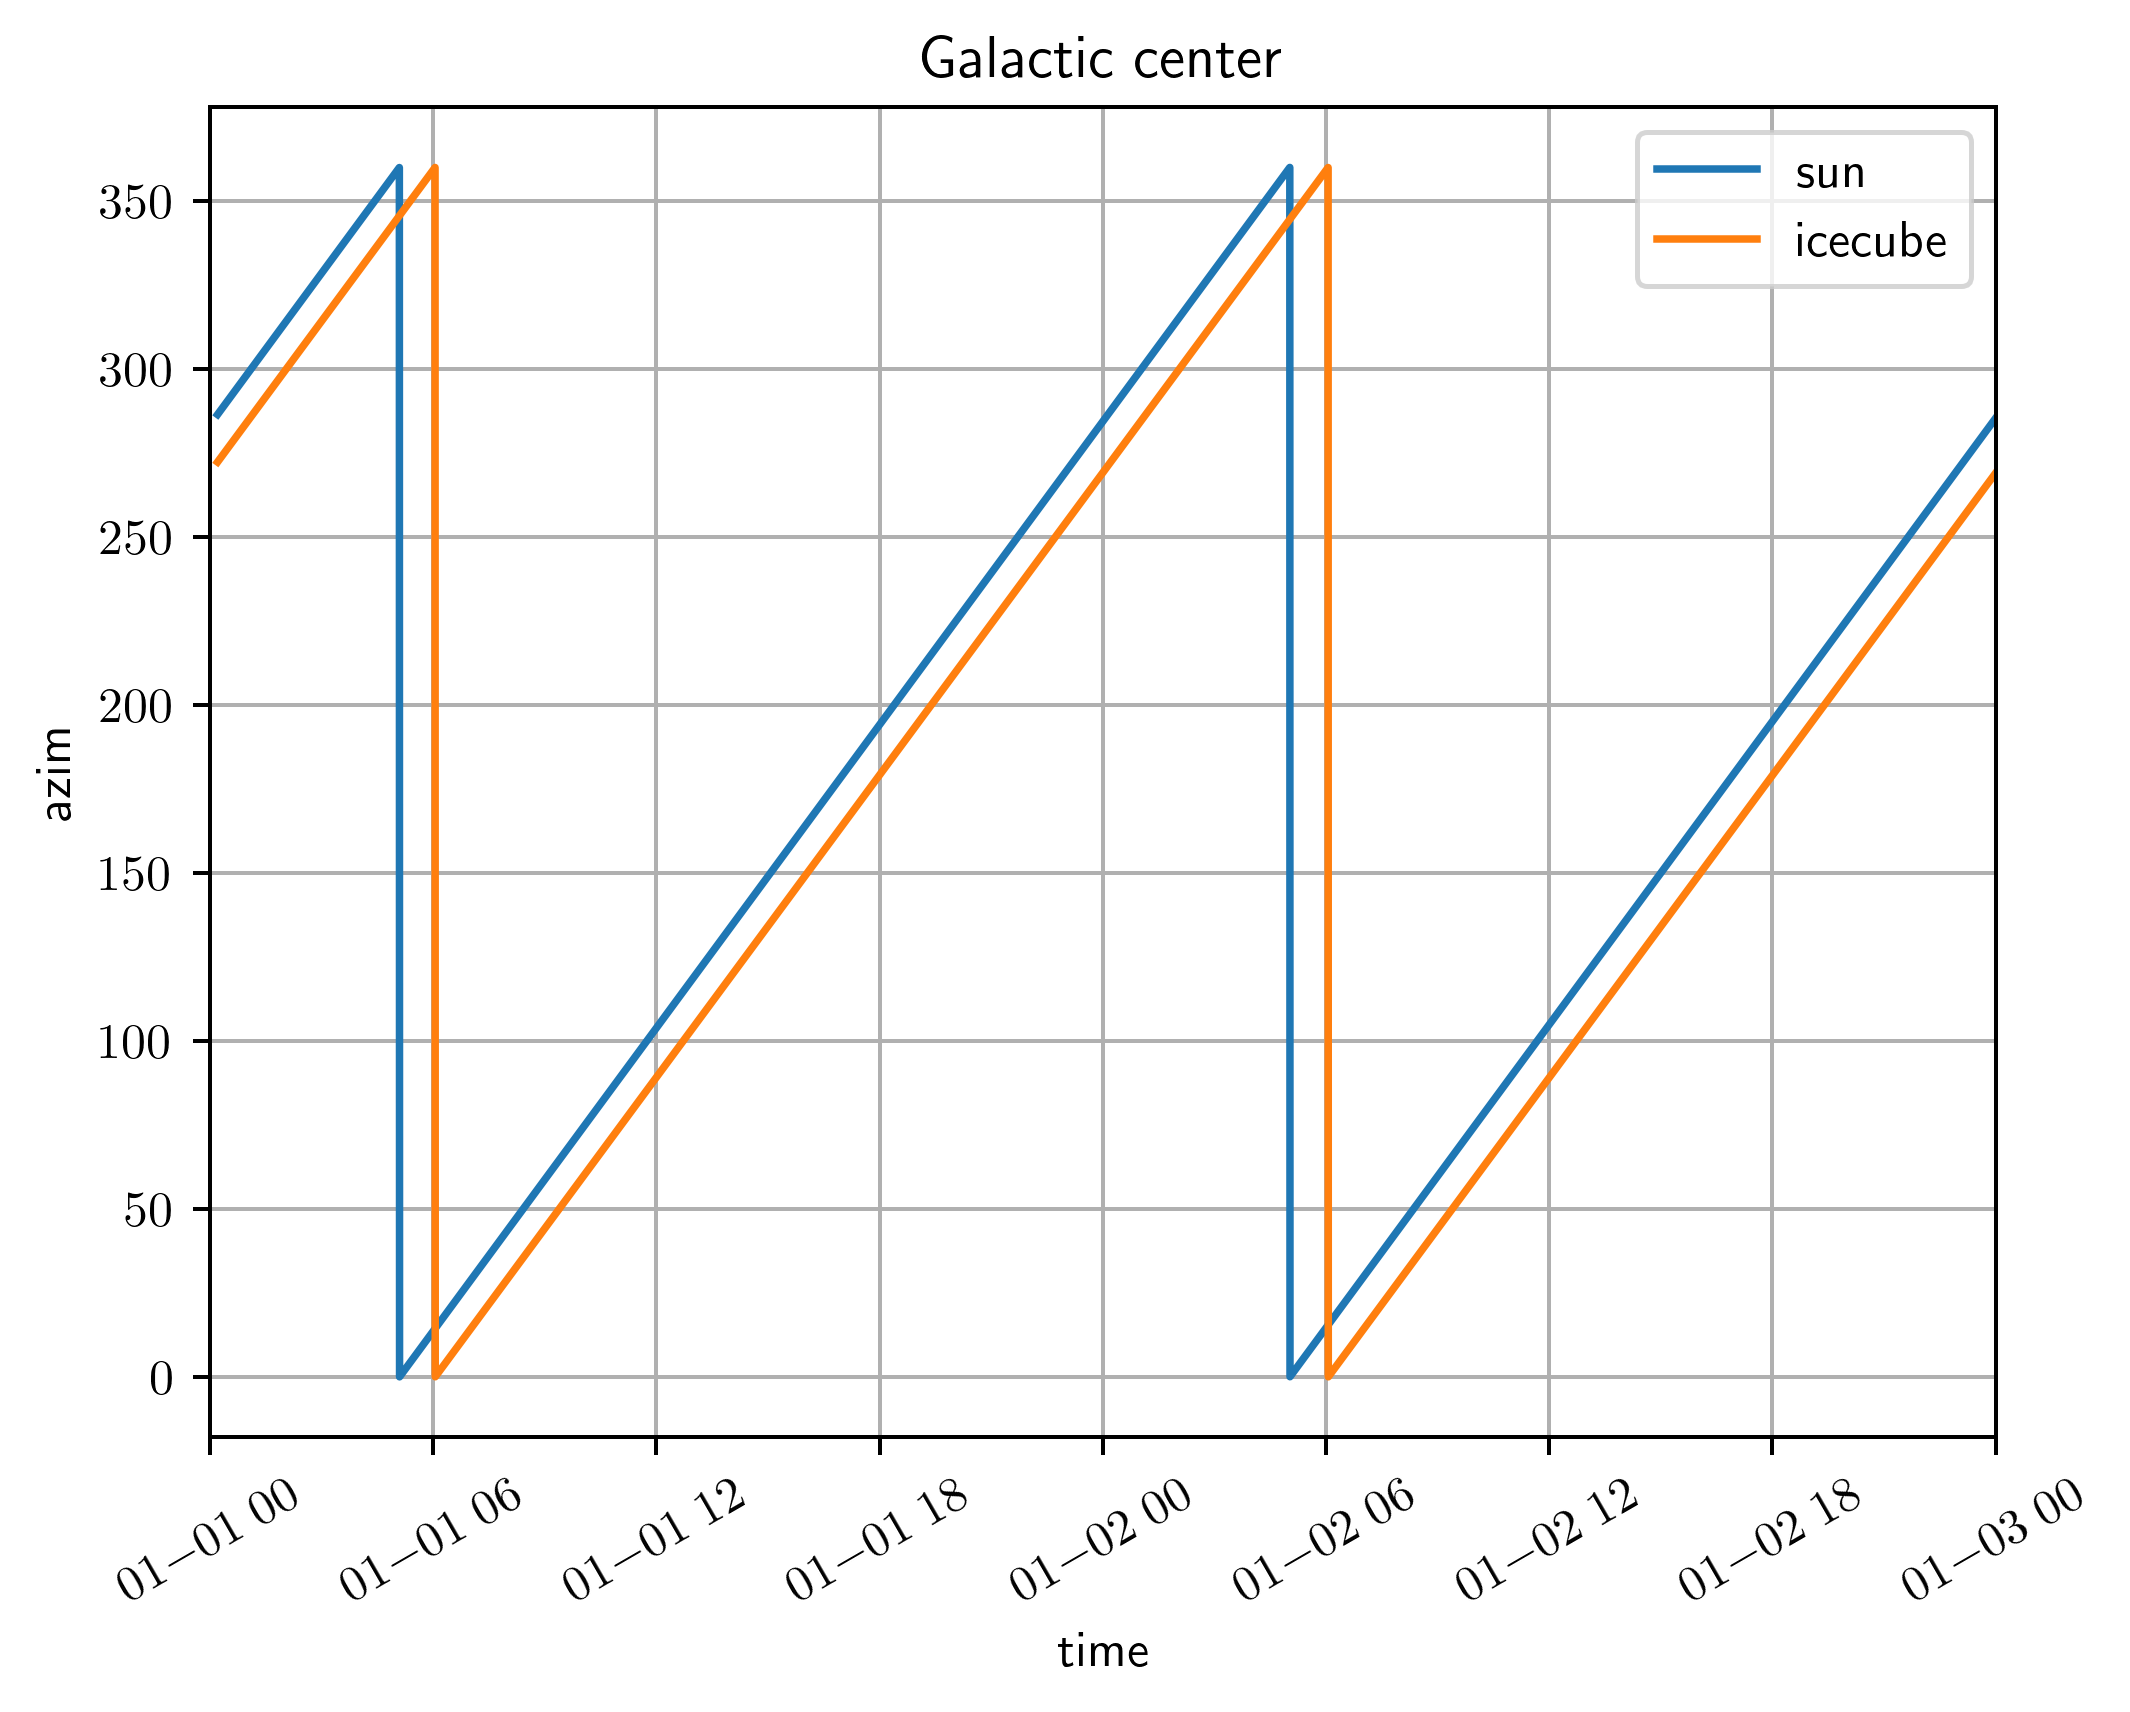

In [17]:
#plt.plot(df_i['time'], df_i['azim_sun'], label='gal center')
plt.plot(df_i['time'], (90-df_i['azim_gc'])%360, label='sun')
plt.plot(df_i['time'], df_i['icecube'], label='icecube')

plt.ylabel('azim')
plt.xlabel('time')
plt.xticks(rotation=30)
plt.xlim(datetime(2024,1,1), datetime(2024,1,3))
plt.title('Galactic center')

plt.grid()
plt.legend()
plt.show()

In [18]:
def datetime_to_mjd(dt):
    import math
    year = dt.year
    month = dt.month
    day = dt.day
    hour = dt.hour
    minute = dt.minute
    second = dt.second
    microsecond = dt.microsecond
    day_fraction = (hour + minute / 60 + (second + microsecond / 1e6) / 3600) / 24
    if month <= 2:
        year -= 1
        month += 12
    A = math.floor(year / 100)
    B = 2 - A + math.floor(A / 4)

    JD = (math.floor(365.25 * (year + 4716)) +
          math.floor(30.6001 * (month + 1)) +
          day + day_fraction + B - 1524.5)
    MJD = JD - 2400000.5
    return MJD

In [19]:
t.jd-2400000.5

array([60311.00832824, 60311.00853754, 60311.00874684, ...,
       60312.67715993, 60312.67736923, 60312.67757853])

In [20]:
tt = []
for _ in time_utc:
    tt.append(datetime_to_mjd(_))

In [21]:
az = np.rad2deg(astro.sun_dir(np.array(tt)))

In [22]:
df_i = pd.DataFrame({'time':time_utc, 'azim_sun':azim_sun, 'azim_gc':gc_altaz, 'icecube':az[1]})
df_i = df_i.sort_values(by=['time'])

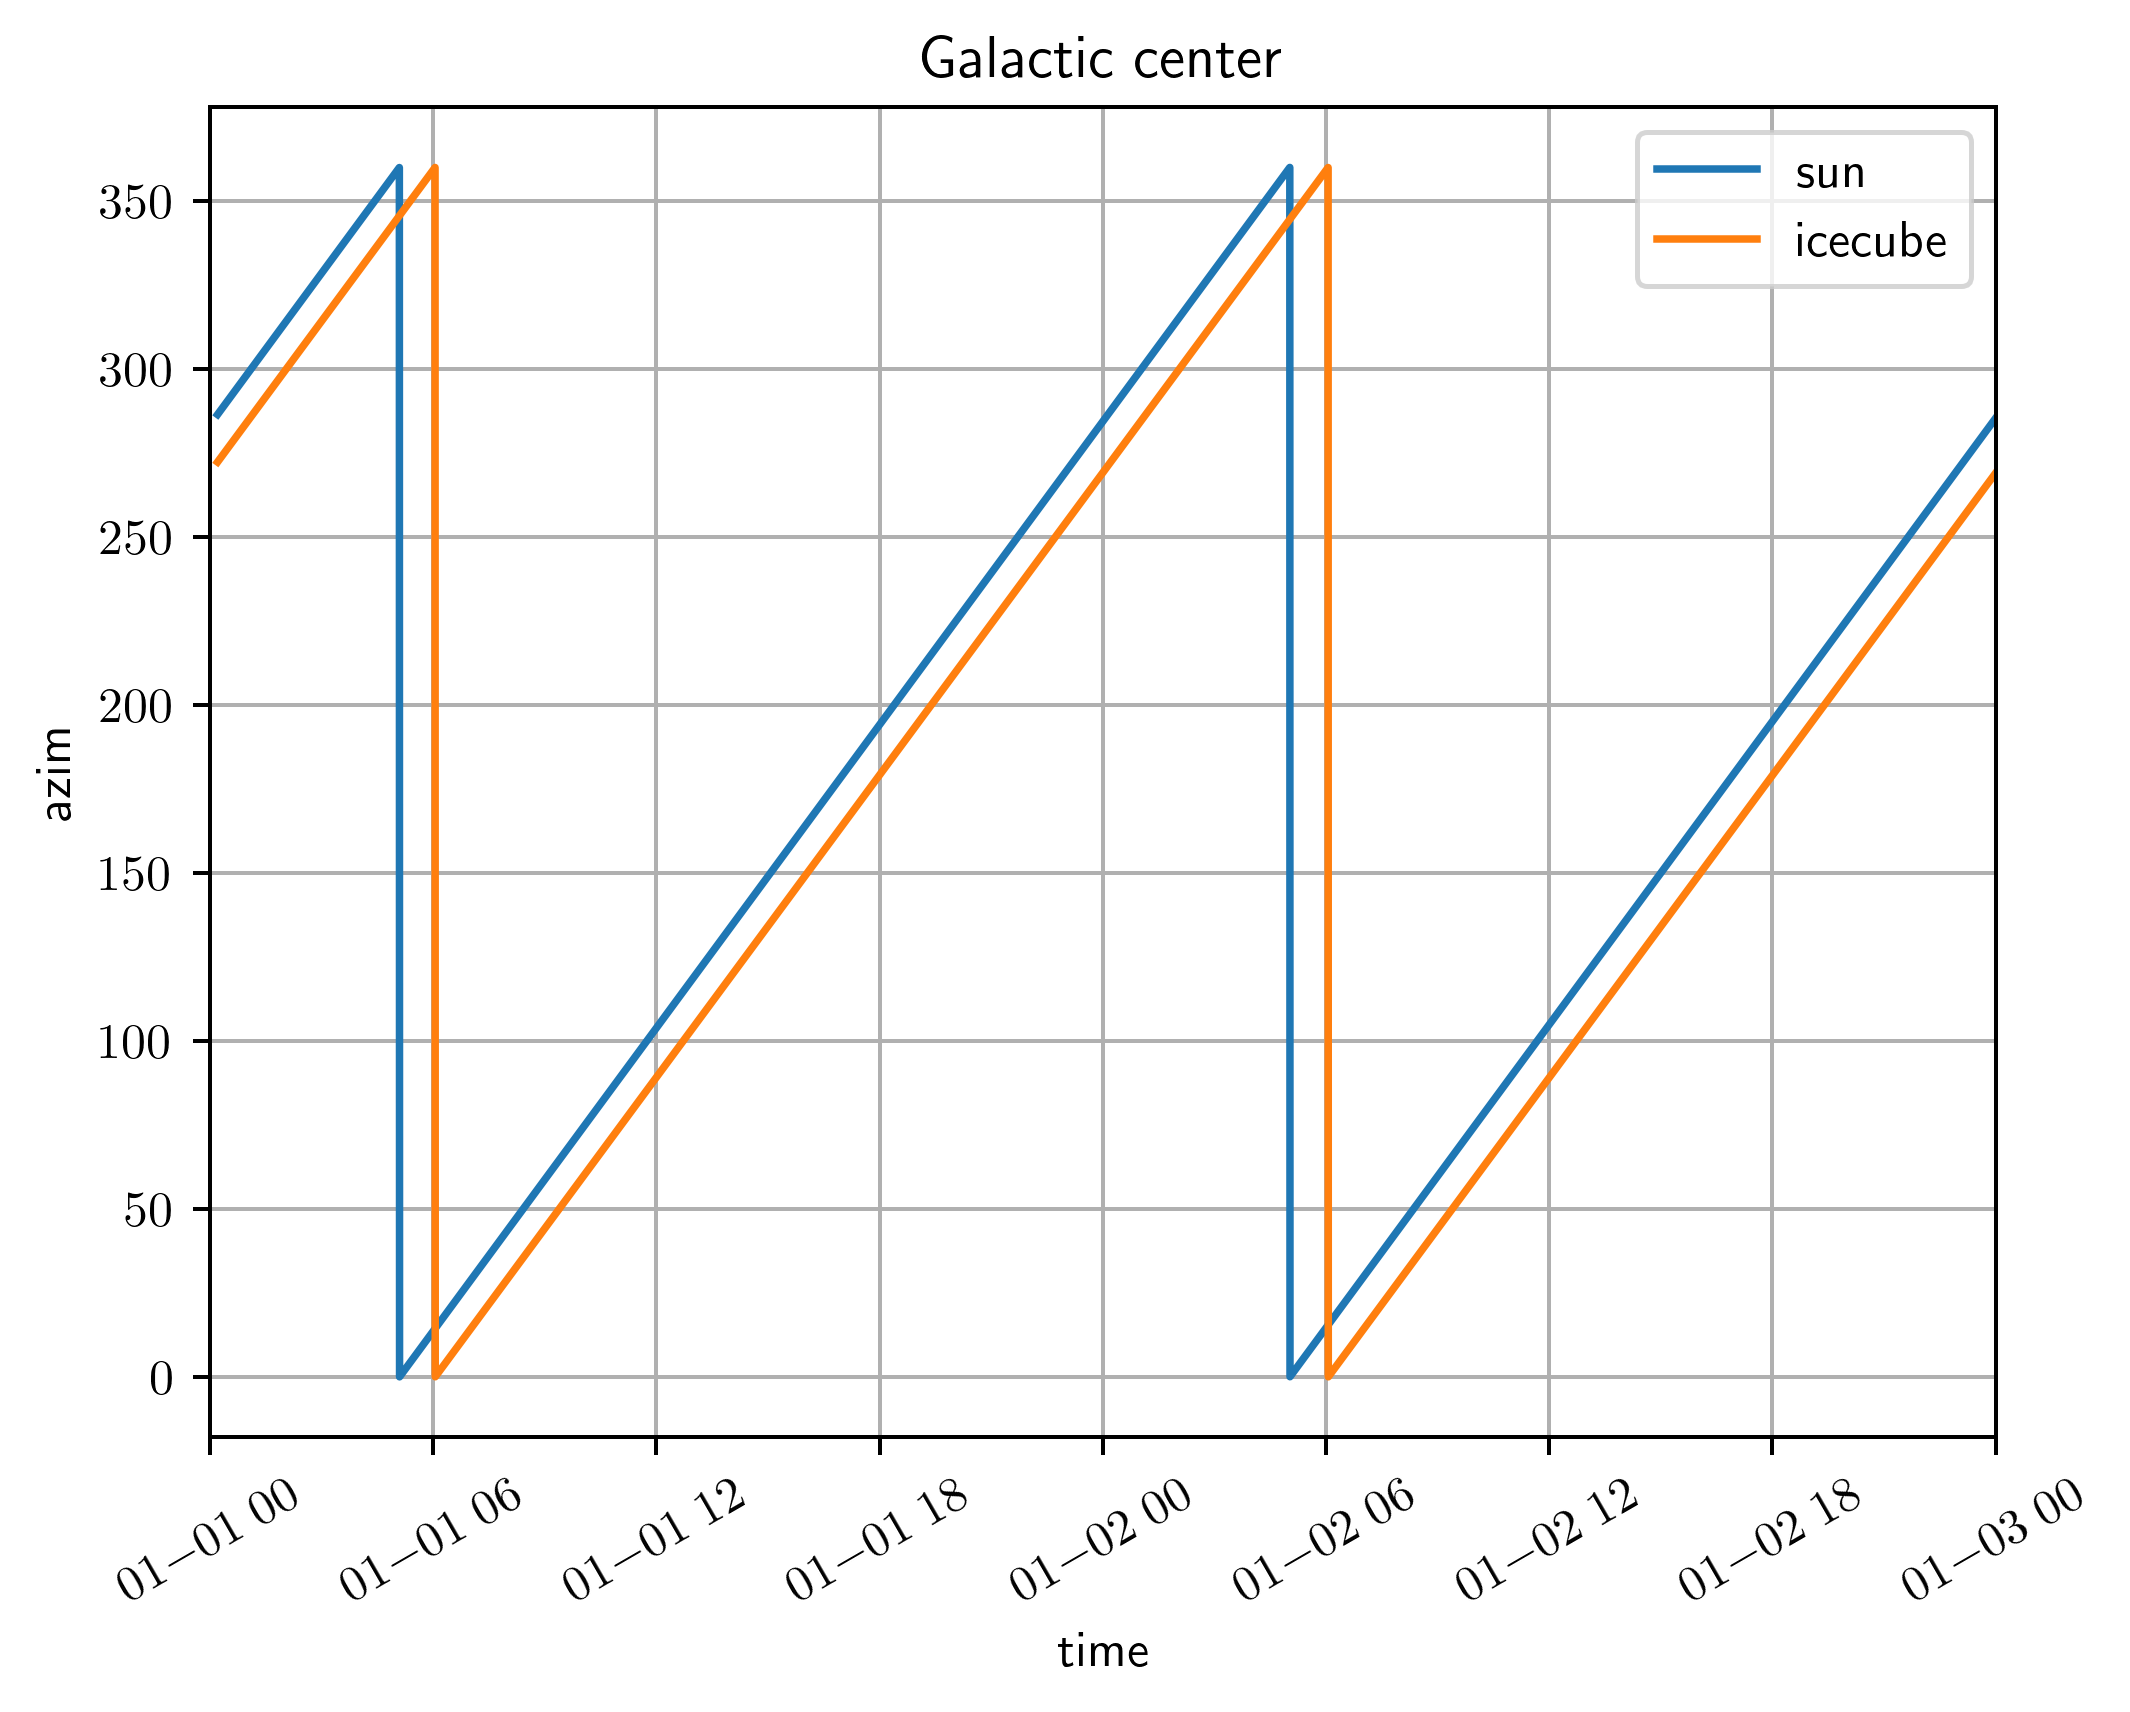

In [23]:
#plt.plot(df_i['time'], df_i['azim_sun'], label='gal center')
plt.plot(df_i['time'], (90-df_i['azim_gc'])%360, label='sun')
plt.plot(df_i['time'], df_i['icecube'], label='icecube')
#plt.plot(df_i['time'], az, label='icecube2')

plt.ylabel('azim')
plt.xlabel('time')
plt.xticks(rotation=30)
plt.xlim(datetime(2024,1,1), datetime(2024,1,3))
plt.title('Galactic center')

plt.grid()
plt.legend()
plt.show()